imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

loading the dataset

In [2]:
data = pd.read_csv('obesity_prediction.csv')

In [3]:
data

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity_level
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


im gonna check if there are missing values

In [4]:
data.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [5]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


im gonna encode the categorical variables

In [6]:
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

im spliting the data

In [7]:
X = data.drop('Obesity_level', axis=1)
y = data['Obesity_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


i stardardize the features

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model Training and Evaluation with Hyperparameter Tuning


Gaussian naive bayes

In [9]:
naive_bayes_model = GaussianNB()
params_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_nb = GridSearchCV(estimator=naive_bayes_model, param_grid=params_nb, cv=5, verbose=1, scoring='accuracy')
grid_nb.fit(X_train, y_train)
nb_predictions = grid_nb.predict(X_test)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


softmax regression

In [10]:
softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
params_softmax = {'C': [0.1, 1, 10], 'penalty': ['l2']}
grid_softmax = GridSearchCV(estimator=softmax_model, param_grid=params_softmax, cv=5, verbose=1, scoring='accuracy')
grid_softmax.fit(X_train, y_train)
softmax_predictions = grid_softmax.predict(X_test)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

random forest

In [11]:
rf_model = RandomForestClassifier(random_state=42)
params_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}
grid_rf = GridSearchCV(estimator=rf_model, param_grid=params_rf, cv=5, verbose=1, scoring='accuracy')
grid_rf.fit(X_train, y_train)
rf_predictions = grid_rf.predict(X_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


support vector machine

In [12]:
svm_model = SVC(random_state=42)
params_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_svm = GridSearchCV(estimator=svm_model, param_grid=params_svm, cv=5, verbose=1, scoring='accuracy')
grid_svm.fit(X_train, y_train)
svm_predictions = grid_svm.predict(X_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


model comparison

In [13]:
print("\nSummary of model performance:")
print("Naive Bayes Accuracy: ", accuracy_score(y_test, nb_predictions))
print("Softmax Regression Accuracy: ", accuracy_score(y_test, softmax_predictions))
print("Random Forest Accuracy: ", accuracy_score(y_test, rf_predictions))
print("SVM Accuracy: ", accuracy_score(y_test, svm_predictions))



Summary of model performance:
Naive Bayes Accuracy:  0.6382978723404256
Softmax Regression Accuracy:  0.9479905437352246
Random Forest Accuracy:  0.9550827423167849
SVM Accuracy:  0.983451536643026


visualizations

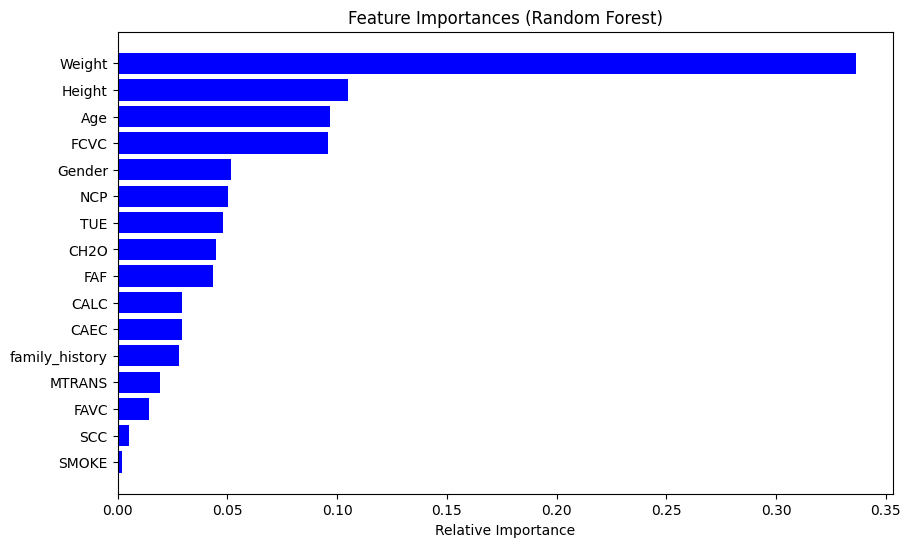

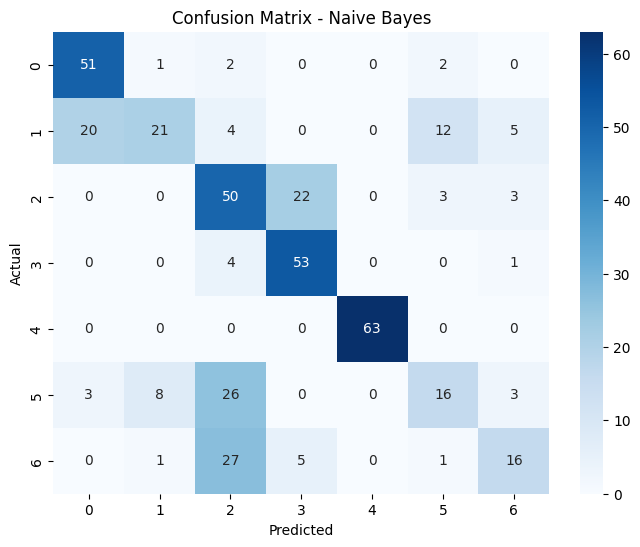

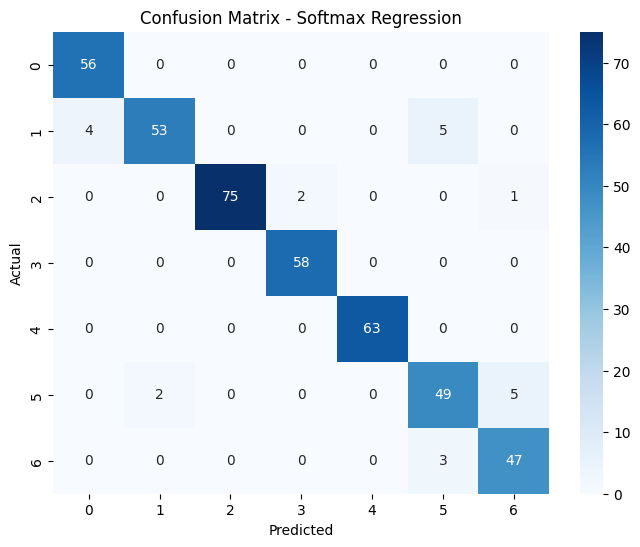

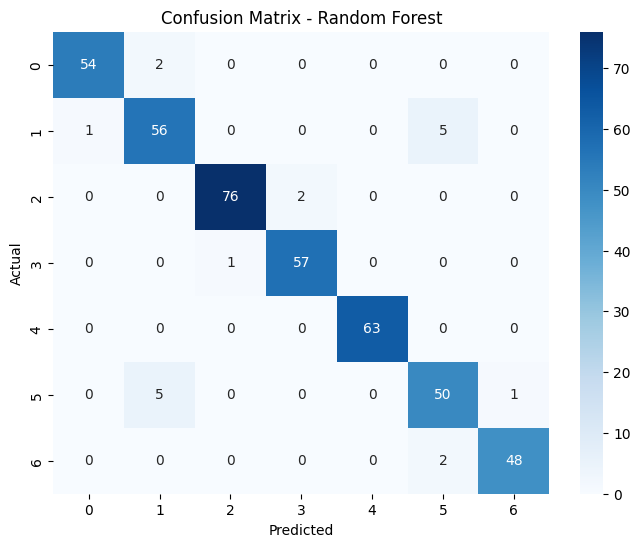

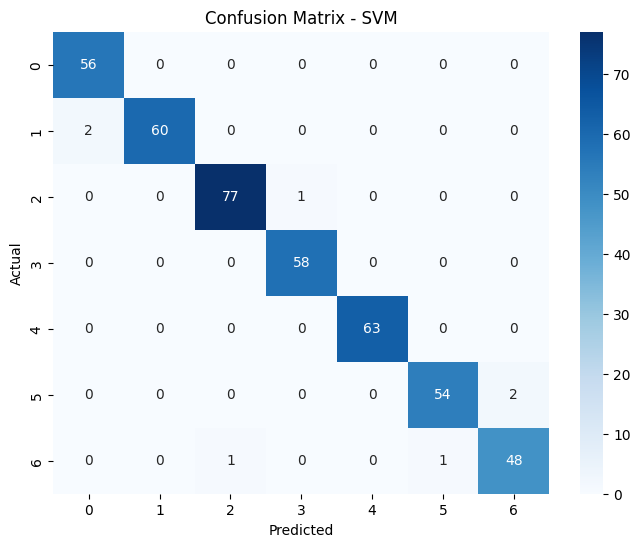

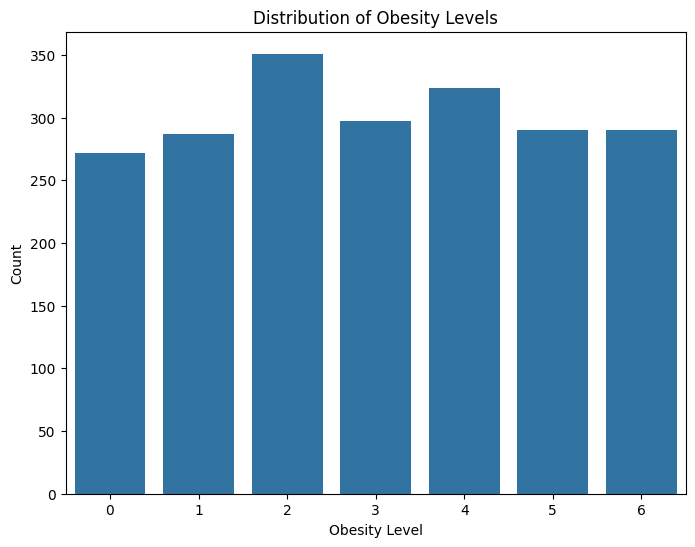

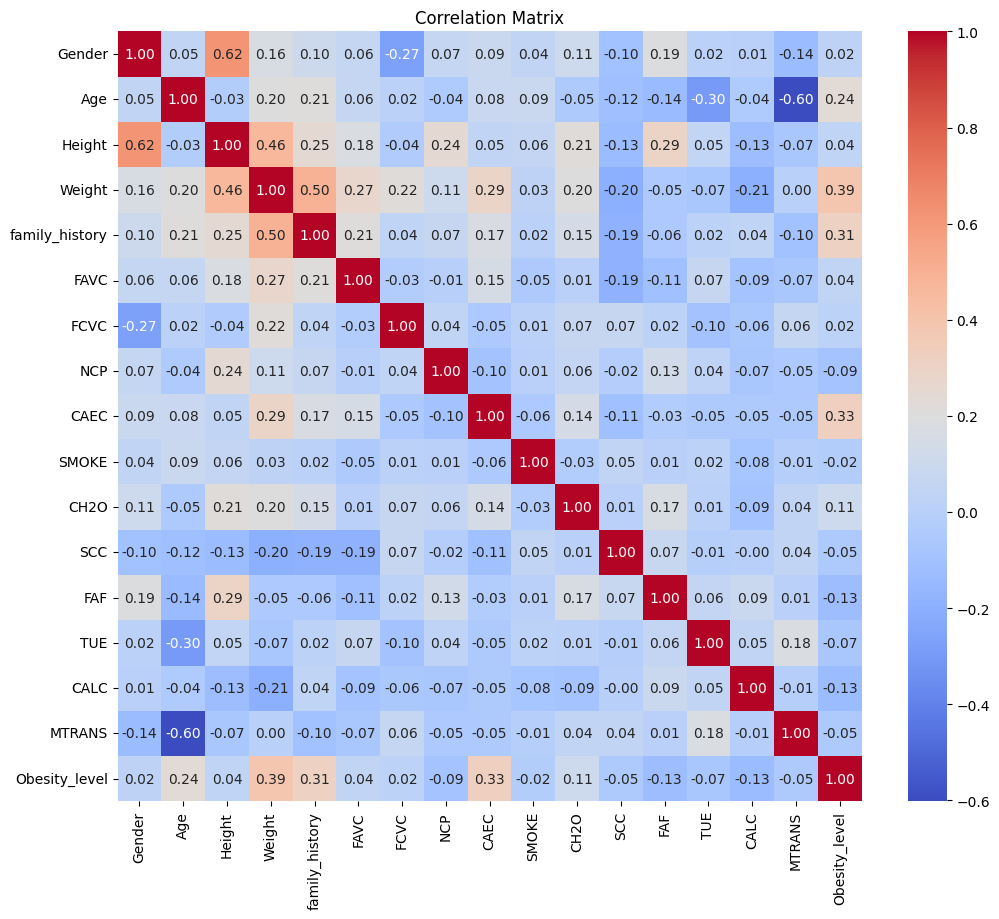

In [14]:
if 'grid_rf' in locals():  # Check if Random Forest was trained
    importances = grid_rf.best_estimator_.feature_importances_
    features = X.columns
    indices = np.argsort(importances)

    plt.figure(figsize=(10, 6))
    plt.title('Feature Importances (Random Forest)')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

# 2. Confusion Matrices
models = {
    'Naive Bayes': nb_predictions,
    'Softmax Regression': softmax_predictions,
    'Random Forest': rf_predictions,
    'SVM': svm_predictions
}

for model_name, predictions in models.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# 3. Distribution of Obesity Levels
plt.figure(figsize=(8, 6))
sns.countplot(x='Obesity_level', data=data)
plt.title('Distribution of Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.show()

# 4. Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()